In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATA

In [49]:
house_data = pd.read_csv('/Users/nguyenbathiem/Documents/GitHub/StockBot/Real-Estate-Price-Prediction/house_price_eda/nhadatvn/cleaned_nhadatvn_data.csv')
house_data.head()

,Mặt tiền,Số tầng,Số phòng vệ sinh,Số phòng ngủ,Đường vào,Diện tích,X,Y,Pháp lý,Địa chỉ,Mô tả,Ngày đăng,Ngày hết hạn,Loại BĐS,Hướng nhà,Hướng ban công,Giá
0,3.0,4.0,4.0,4.0,7.0,30.0,21.010153,105.798834,Sổ đỏ/ Sổ hồng,"Phường Trung Hoà, Quận Cầu Giấy, Hà Nội","01 căn duy nhất Trung Kính, ô tô tránh, hai th...",14/12/2022,24/12/2022,"Bán nhà ngõ, hẻm",NaN,NaN,6.7
1,4.3,4.0,4.0,4.0,4.0,50.0,21.034721,105.827155,Sổ đỏ/ Sổ hồng,"Đội cấn, Phường Đội Cấn, Quận Ba Đình, Hà Nội",Ngõ 294 Đội Cấn là ngõ thông sang ngõ 10 Kim M...,15/03/2023,25/03/2023,"Bán nhà ngõ, hẻm",NaN,NaN,6.3
2,4.0,6.0,5.0,4.0,4.0,39.0,21.034989,105.793802,Sổ đỏ/ Sổ hồng,"Cầu Giấy, Phường Dịch Vọng, Quận Cầu Giấy, Hà Nội",Bán nhà mặt ngõ Cầu Giấy 6 tầng PHÂN LÔ Ô TÔ T...,15/03/2023,25/03/2023,"Bán nhà ngõ, hẻm",NaN,NaN,7.9
3,4.6,6.0,5.0,5.0,1.0,48.0,21.034989,105.793802,Sổ đỏ/ Sổ hồng,"Cầu Giấy, Phường Dịch Vọng, Quận Cầu Giấy, Hà Nội","Bán nhà Cầu Giấy, PHÂN LÔ Ô TÔ 48m2 6T 9 tỷ Ô ...",15/03/2023,25/03/2023,"Bán nhà ngõ, hẻm",NaN,NaN,9.2
4,5.0,4.0,4.0,4.0,1.0,50.0,21.023258,105.807148,Sổ đỏ/ Sổ hồng,"Chùa Láng, Phường Láng Hạ, Quận Đống Đa, Hà Nội",Vị trí hót nhất đống đa trong phân khúc dưới 4...,15/03/2023,25/03/2023,"Bán nhà ngõ, hẻm",NaN,NaN,3.5


In [50]:
house_data.describe()
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18382 entries, 0 to 18381
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mặt tiền          16009 non-null  float64
 1   Số tầng           15285 non-null  float64
 2   Số phòng vệ sinh  13718 non-null  float64
 3   Số phòng ngủ      14758 non-null  float64
 4   Đường vào         18150 non-null  float64
 5   Diện tích         18345 non-null  float64
 6   X                 18357 non-null  float64
 7   Y                 18357 non-null  float64
 8   Pháp lý           18349 non-null  object 
 9   Địa chỉ           18357 non-null  object 
 10  Mô tả             18382 non-null  object 
 11  Ngày đăng         18382 non-null  object 
 12  Ngày hết hạn      18382 non-null  object 
 13  Loại BĐS          18382 non-null  object 
 14  Hướng nhà         245 non-null    object 
 15  Hướng ban công    151 non-null    object 
 16  Giá               18382 non-null  float6

In [51]:
# # Identify float columns
# float_columns = house_data.select_dtypes(include=['float64']).columns

# # Plot each float column
# for col in float_columns:
#     house_data[col].value_counts().sort_index().plot(kind='bar', title=col)
#     plt.show()

## REMOVING OUTLIER

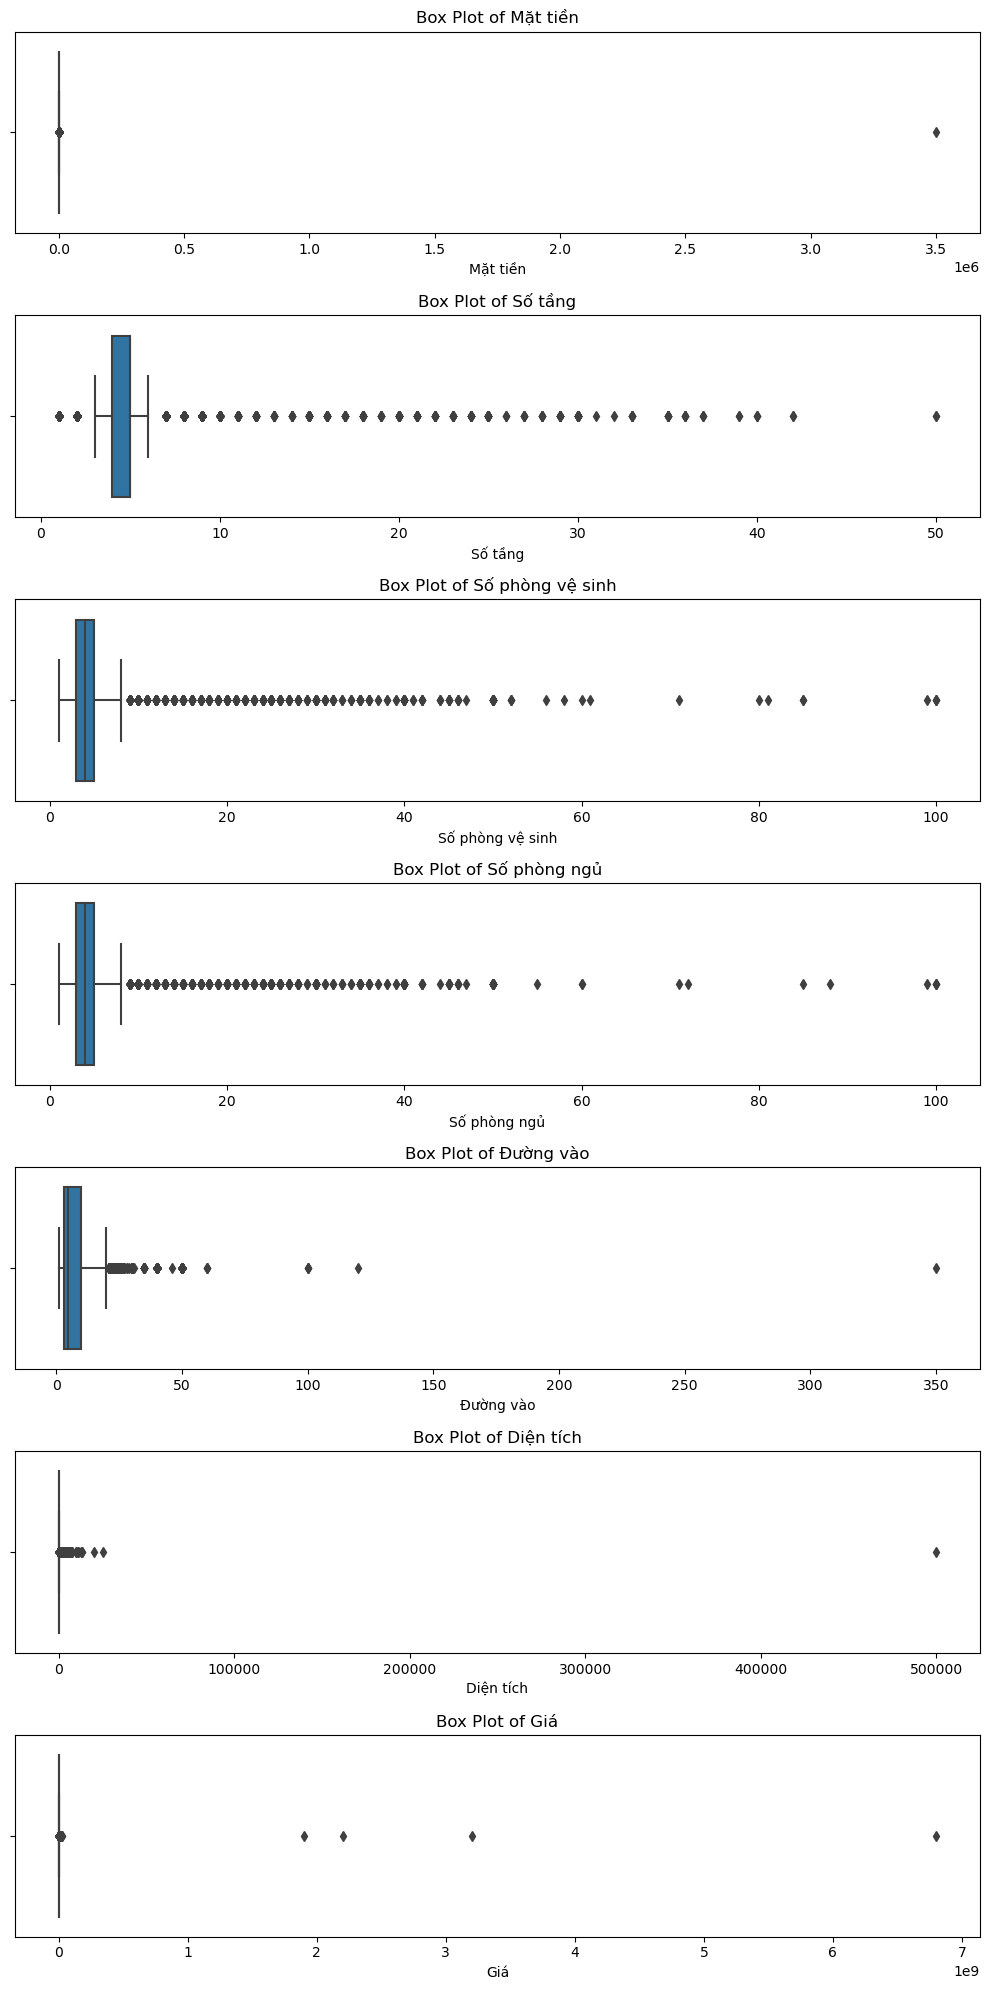

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
columns_to_plot = ['Mặt tiền', 'Số tầng', 'Số phòng vệ sinh', 'Số phòng ngủ', 'Đường vào', 'Diện tích', 'Giá']

# Convert columns to numeric
for col in columns_to_plot:
    house_data[col] = pd.to_numeric(house_data[col], errors='coerce')

# Plotting
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 20))

for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=house_data, x=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [53]:
copy_house_data = house_data.copy()
copy_house_data['Loại BĐS'].unique()
# copy_house_data['Loại BĐS'].value_counts().sort_index().plot(kind='bar', title=col)
# plt.show()
# 'Bán căn hộ chung cư'
# Getting the description ('Mô tả') of the house with the maximum 'Đường vào' value
# copy_house_data[copy_house_data['Số phòng ngủ']==copy_house_data['Số phòng ngủ'].max()].head()
# copy_house_data[copy_house_data['Đường vào']==copy_house_data['Đường vào'].max()]


#outlier consider
# copy_house_data[copy_house_data['Mặt tiền']==copy_house_data['Mặt tiền'].max()]
# copy_house_data[copy_house_data['Diện tích']==copy_house_data['Diện tích'].max()].head()
# copy_house_data[copy_house_data['Giá']==copy_house_data['Giá'].max()].head()

array(['Bán nhà ngõ, hẻm', 'Bán nhà mặt tiền', 'Bán căn hộ chung cư',
       'Bán biệt thự, villa,', 'Bán đất thổ cư',
       'Bán loại bất động sản khác', 'Bán đất nền dự án', 'Bán Shophouse',
       'Bán nhà cấp 4', 'Bán nhà trọ', 'Bán kho xưởng', 'Bán condotel',
       'Bán đất nông nghiệp'], dtype=object)

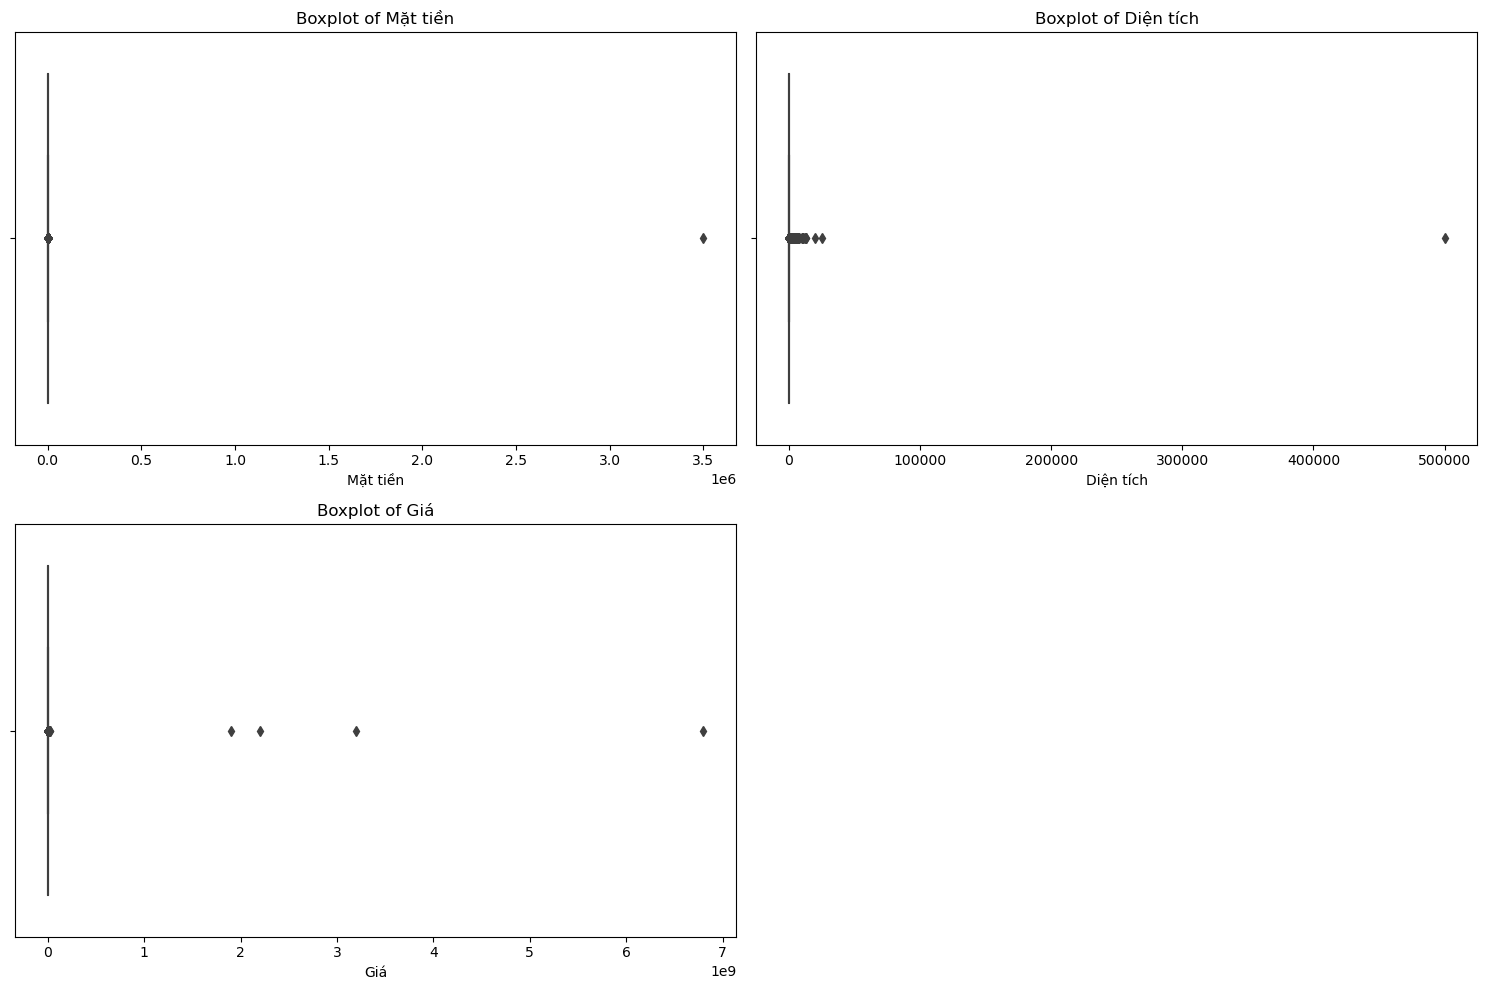

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12766 entries, 0 to 18381
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mặt tiền          12766 non-null  float64
 1   Số tầng           10810 non-null  float64
 2   Số phòng vệ sinh  9949 non-null   float64
 3   Số phòng ngủ      10646 non-null  float64
 4   Đường vào         12709 non-null  float64
 5   Diện tích         12766 non-null  float64
 6   X                 12766 non-null  float64
 7   Y                 12766 non-null  float64
 8   Pháp lý           12766 non-null  object 
 9   Địa chỉ           12766 non-null  object 
 10  Mô tả             12766 non-null  object 
 11  Ngày đăng         12766 non-null  object 
 12  Ngày hết hạn      12766 non-null  object 
 13  Loại BĐS          12766 non-null  object 
 14  Hướng nhà         142 non-null    object 
 15  Hướng ban công    97 non-null     object 
 16  Giá               12766 non-null  float6

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
data = house_data.copy()
# Columns to remove outliers from
columns = ['Mặt tiền', 'Diện tích', 'Giá'] #, 'Đường vào'

# Plotting boxplots for each column to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Removing outliers using IQR method
filtered_data = data.copy()
for col in columns:
    Q1 = filtered_data[col].quantile(0.25)
    Q3 = filtered_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)]

# Show the shape of the dataset before and after outlier removal
original_shape = data.shape
filtered_shape = filtered_data.shape

original_shape, filtered_shape
house_data = filtered_data.copy()
house_data.info()

In [55]:
# copy_house_data = house_data.copy()
# copy_house_data = copy_house_data.dropna(subset=['X'])
# copy_house_data.info() 
# copy_house_data.shape
house_data.nunique()

Mặt tiền              143
Số tầng                38
Số phòng vệ sinh       35
Số phòng ngủ           35
Đường vào              42
Diện tích             120
X                    1548
Y                    1427
Pháp lý                 3
Địa chỉ              2691
Mô tả               12766
Ngày đăng             426
Ngày hết hạn          429
Loại BĐS               11
Hướng nhà               8
Hướng ban công          8
Giá                   322
dtype: int64

In [56]:
# import folium
# from branca.colormap import linear

# # Assuming 'house_data' has 'X', 'Y', and 'Giá' columns
# coordinates = house_data[['X', 'Y']].values.tolist()
# prices = house_data['Giá'].tolist()

# # Creating a color scale for the prices
# max_price = max(prices)
# min_price = min(prices)
# colormap = linear.YlOrRd_09.scale(min_price, max_price)

# # Create a map centered around the first coordinate
# map = folium.Map(location=coordinates[0], zoom_start=13)

# # Add circle markers to the map
# for (lat, lon), price in zip(coordinates, prices):
#     # Color based on price
#     color = colormap(price)

#     # Create circle marker
#     folium.CircleMarker(
#         location=[lat, lon],
#         radius=5,  # You can adjust the size
#         color=color,
#         fill=True,
#         fill_color=color
#     ).add_to(map)

# # Add the color map legend to the map
# colormap.caption = 'Price Scale'
# colormap.add_to(map)

# # Display the map
# map


## TRANSFORMING DATA

In [57]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12766 entries, 0 to 18381
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mặt tiền          12766 non-null  float64
 1   Số tầng           10810 non-null  float64
 2   Số phòng vệ sinh  9949 non-null   float64
 3   Số phòng ngủ      10646 non-null  float64
 4   Đường vào         12709 non-null  float64
 5   Diện tích         12766 non-null  float64
 6   X                 12766 non-null  float64
 7   Y                 12766 non-null  float64
 8   Pháp lý           12766 non-null  object 
 9   Địa chỉ           12766 non-null  object 
 10  Mô tả             12766 non-null  object 
 11  Ngày đăng         12766 non-null  object 
 12  Ngày hết hạn      12766 non-null  object 
 13  Loại BĐS          12766 non-null  object 
 14  Hướng nhà         142 non-null    object 
 15  Hướng ban công    97 non-null     object 
 16  Giá               12766 non-null  float6

In [58]:
data = house_data.copy()
data = data.drop(['Hướng nhà', 'Hướng ban công'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12766 entries, 0 to 18381
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mặt tiền          12766 non-null  float64
 1   Số tầng           10810 non-null  float64
 2   Số phòng vệ sinh  9949 non-null   float64
 3   Số phòng ngủ      10646 non-null  float64
 4   Đường vào         12709 non-null  float64
 5   Diện tích         12766 non-null  float64
 6   X                 12766 non-null  float64
 7   Y                 12766 non-null  float64
 8   Pháp lý           12766 non-null  object 
 9   Địa chỉ           12766 non-null  object 
 10  Mô tả             12766 non-null  object 
 11  Ngày đăng         12766 non-null  object 
 12  Ngày hết hạn      12766 non-null  object 
 13  Loại BĐS          12766 non-null  object 
 14  Giá               12766 non-null  float64
dtypes: float64(9), object(6)
memory usage: 1.6+ MB


### Transform

In [59]:
# Example DataFrame
# data = house_data.copy()
data = data.copy()
# Replace NaN values in specified columns with 'NaN'
# data[['Pháp lý', 'Loại BĐS', 'Hướng nhà', 'Hướng ban công']] = data[['Pháp lý', 'Loại BĐS', 'Hướng nhà', 'Hướng ban công']].fillna('NaN')
data[['Pháp lý', 'Loại BĐS']] = data[['Pháp lý', 'Loại BĐS']].fillna('NaN')
# ,'Hướng nhà', 'Hướng ban công'

# print(data['Hướng ban công'].head())
one_hot_df = pd.get_dummies(data, columns=['Pháp lý','Loại BĐS'])
one_hot_df.drop(['Mô tả', 'Ngày đăng', 'Ngày hết hạn', 'Địa chỉ'], axis=1, inplace=True)
one_hot_df.head()
# one_hot_df['Y'].max()
# one_hot_df.info()

,Mặt tiền,Số tầng,Số phòng vệ sinh,Số phòng ngủ,Đường vào,Diện tích,X,Y,Giá,Pháp lý_Hợp đồng mua bán,...,"Loại BĐS_Bán biệt thự, villa,",Loại BĐS_Bán căn hộ chung cư,Loại BĐS_Bán loại bất động sản khác,Loại BĐS_Bán nhà cấp 4,Loại BĐS_Bán nhà mặt tiền,"Loại BĐS_Bán nhà ngõ, hẻm",Loại BĐS_Bán nhà trọ,Loại BĐS_Bán đất nông nghiệp,Loại BĐS_Bán đất nền dự án,Loại BĐS_Bán đất thổ cư
0,3.0,4.0,4.0,4.0,7.0,30.0,21.010153,105.798834,6.7,0,...,0,0,0,0,0,1,0,0,0,0
1,4.3,4.0,4.0,4.0,4.0,50.0,21.034721,105.827155,6.3,0,...,0,0,0,0,0,1,0,0,0,0
2,4.0,6.0,5.0,4.0,4.0,39.0,21.034989,105.793802,7.9,0,...,0,0,0,0,0,1,0,0,0,0
3,4.6,6.0,5.0,5.0,1.0,48.0,21.034989,105.793802,9.2,0,...,0,0,0,0,0,1,0,0,0,0
4,5.0,4.0,4.0,4.0,1.0,50.0,21.023258,105.807148,3.5,0,...,0,0,0,0,0,1,0,0,0,0


### Normalize

In [60]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'data' is your DataFrame and it contains the specified columns
columns_to_normalize = ['Mặt tiền', 'Số tầng', 'Số phòng vệ sinh', 'Số phòng ngủ', 'Đường vào', 'Diện tích', 'X', 'Y']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize each specified column
for column in columns_to_normalize:
    # Select the column and reshape it for the scaler
    col_values = one_hot_df[[column]]

    # Replace NaN with the mean of the column
    col_values_filled = col_values.fillna(col_values.mean())

    # Apply the scaler and transform the data
    normalized_values = scaler.fit_transform(col_values_filled)
    normalized_values_flat = normalized_values.ravel()

    # Assign the normalized values directly to the DataFrame
    one_hot_df[column] = normalized_values_flat

# The DataFrame 'one_hot_df' now has the original columns replaced with their normalized values


In [61]:
one_hot_df.describe()
# one_hot_df.info()

,Mặt tiền,Số tầng,Số phòng vệ sinh,Số phòng ngủ,Đường vào,Diện tích,X,Y,Giá,Pháp lý_Hợp đồng mua bán,...,"Loại BĐS_Bán biệt thự, villa,",Loại BĐS_Bán căn hộ chung cư,Loại BĐS_Bán loại bất động sản khác,Loại BĐS_Bán nhà cấp 4,Loại BĐS_Bán nhà mặt tiền,"Loại BĐS_Bán nhà ngõ, hẻm",Loại BĐS_Bán nhà trọ,Loại BĐS_Bán đất nông nghiệp,Loại BĐS_Bán đất nền dự án,Loại BĐS_Bán đất thổ cư
count,12766.000000,12766.000000,12766.000000,12766.000000,12766.000000,12766.000000,12766.000000,12766.000000,12766.000000,12766.000000,...,12766.000000,12766.000000,12766.000000,12766.000000,12766.000000,12766.000000,12766.000000,12766.000000,12766.000000,12766.000000
mean,0.450597,0.078248,0.087959,0.088034,0.054385,0.444624,0.822725,0.397431,6.465791,0.007912,...,0.029453,0.038618,0.002037,0.004857,0.135281,0.676406,0.000470,0.000157,0.005718,0.106768
std,0.138500,0.050220,0.081902,0.079310,0.068918,0.167841,0.013854,0.022008,4.341799,0.088598,...,0.169080,0.192691,0.045085,0.069523,0.342037,0.467865,0.021675,0.012516,0.075406,0.308830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.061224,0.051282,0.051282,0.020202,0.322314,0.818462,0.388823,3.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.078248,0.076923,0.076923,0.030303,0.413223,0.821888,0.398268,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.081633,0.087959,0.088034,0.070707,0.520661,0.825569,0.406018,8.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.200000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Selection

## TRAINING

In [62]:
# from sklearn.model_selection import train_test_split
# # Assuming 'data' is your DataFrame and 'target_column' is the name of your target variable
# X = one_hot_df.drop('Giá', axis=1)  # Features
# y = one_hot_df['Giá']               # Target variable

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [63]:
# from sklearn.linear_model import LinearRegression, Lasso, LassoCV
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
# import numpy as np



# # Create a linear regression model
# model = LassoCV(cv=5, random_state=0)
# # model = LinearRegression()
# # model =  Lasso(alpha=0.001)

# # Train the model
# model.fit(X_train, y_train)

# # Predict on the testing set
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# # Calculating the R-squared score
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"Root Mean Squared Error: {rmse}")
# print(f"R-squared Score: {r2}")


In [64]:
import torch

# Choose device: use MPS if available, otherwise CPU
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: mps


In [107]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess your data
# Assuming 'data' is your DataFrame and 'target' is your target column
X = one_hot_df.drop('Giá', axis=1).to_numpy()  # Features
y = one_hot_df['Giá'].to_numpy()

# Split data into training and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Split the remaining data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42)
# X_train_np = X_train.values
# y_train_np = y_train.values
# X_test_np = X_test.values
# y_test_np = y_test.values

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32).to(device)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.float32).to(device)

# Create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False)
# train_dataset[0]

In [108]:
import torch.nn as nn

import torch.nn as nn

class RegressionNet(nn.Module):
    def __init__(self, num_features):
        super(RegressionNet, self).__init__()
        self.layer1 = nn.Linear(num_features, 64)
        self.layer2 = nn.Linear(64, 64)
        # self.layer3 = nn.Linear(32, 32)
        self.output_layer = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)  # Dropout layer

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.relu(self.layer2(x))
        x = self.dropout(x) 
        # x = self.relu(self.layer3(x))
        # x = self.dropout(x) 
        x = self.output_layer(x)
        return x

# Instantiate the model
model = RegressionNet(X_train.shape[1]).to(device)


In [109]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [116]:
# Train the model
num_epochs = 100
best_loss = 10000
total_loss = 0
valid_loss = 0
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1)) # Unsqueezing since targets need to have the same dimensions as outputs

        # Backward pass and optimization
        loss.backward()

        total_loss += loss.item()
        optimizer.step()
        optimizer.zero_grad()
        
    epoch_loss = (total_loss/len(train_loader))**(1/2)
    
    model.eval() 
    for inputs, targets in valid_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1)) # Unsqueezing since targets need to have the same dimensions as outputs

        valid_loss += loss.item()
        
    valid = (valid_loss/len(valid_loader))**(1/2)
        
        
    if (epoch) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Valid Loss: {valid:.4f}')
        
    if valid < best_loss:
        best_loss = valid
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Valid Loss: {valid:.4f}')
        checkpoint = { 
            'epoch': epoch,
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'loss': valid
        }
        save_path = f'valid_model.pth'
        torch.save(checkpoint, save_path)
        print('Save model')        

Epoch [1/100], Train Loss: 3.0495, Valid Loss: 2.9393
Epoch [1/100], Train Loss: 3.0495, Valid Loss: 2.9393
Save model
Epoch [11/100], Train Loss: 10.1067, Valid Loss: 9.7504


KeyboardInterrupt: 

In [117]:
from sklearn.metrics import r2_score, mean_squared_error
checkpoint = torch.load('valid_model.pth', map_location=device)
model.load_state_dict(checkpoint['model'])
model.eval()  # Set the model to evaluation mode

# Store all predictions and actual values
all_preds = []
all_targets = []

with torch.no_grad():
    
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        all_preds.extend(outputs.squeeze(1).cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Calculate R-squared score
r2 = r2_score(all_targets, all_preds)
rmse = mean_squared_error(all_targets, all_preds)**1/2

print(f"R-squared Score on Test Set: {r2}")
print(f"RMSE on Test Set: {rmse}")

R-squared Score on Test Set: 0.536259198829445
RMSE on Test Set: 4.382693767547607


## TESTING